# MuMoT Demonstration Notebook: SIRI Epidemic Model <a class="tocSkip">

## Multiscale Modelling Tool  <a class="tocSkip">

This is a demo for [MuMoT](https://github.com/DiODeProject/MuMoT), a software tool developed at the University of Sheffield as part of the [DiODe](http://diode.group.shef.ac.uk) project

*Current MuMoT version*: **0.0**

In [2]:
import MuMoT.MuMoT as mmt

Created `%%model` as an alias for `%%latex`.


### Defining the SIRI model
In this demo we study the role of susceptibility to reinfections in epidemiology models by considering the spread of a contagious process using the SIRI (Susceptible-Infected-Recovered-Infected) model in which the rate of primary infections is different from the rate of secondary infections. The SIRI model contains the SIS and SIR models as special cases and allows for the study of systems in which individuals become more or less susceptible to the infection after first exposure.

See the following publications for more details on the SIRI model:
 - [R. Pagliara, B. Dey and N. E. Leonard, "Bistability and Resurgent Epidemics in Reinfection Models," in IEEE Control Systems Letters, vol. 2, no. 2, pp. 290-295, April 2018.](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8353159&isnumber=8226891)

In [36]:
%%model
$
S + I -> I + I : b
R + I -> I + I : g
I -> R : d
$

<IPython.core.display.Latex object>

In [37]:
model1 = mmt.parseModel(In[36])

In [38]:
model1.showRates()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
model1.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We can even see a simple figure representing our model...

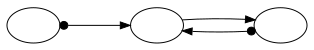

In [40]:
model1.visualise()

This figure attempts to represent the nature of the interactions between reactants graphically, from simple transitions (arrows), inhibitions (filled circles) and induced switches (arrows with filled circles at the origin); to understand the different interaction patterns try relating the arrows with the reactions we defined above, by reference to the rates they are labelled with.

### Well-Mixed SIRI

Here we explore the SIRI model under the assumption of a large number of individuals in the population where any two individuals have the same probability of interaction.

In [41]:
model1.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This is where things start getting interesting, because equations are what mathematicians analyse. `showODEs` shows the model's Ordinary Differential Equations, which describe how the populations of reactants in the model change over time. MuMoT has derived these equations for you automatically, from your description of the reactions. If you are familiar with ODEs then you should be able to read these quite easily. However even if you are not, you can still work with them.

So, what analysis can we do in MuMoT now we've found our ODEs?

Well, we might want to look at how the state of the system (the proportions of the different reactants) change on average over time...

...but before we can do that, we need to let MuMoT know that this is actually a simpler set of equations than it appears to be. $S$ (Susceptible), $I$ (Infected), and $R$ (Recovered) represent states that individuals can be in. In the ODEs above, $S$, $I$, and $R$ represent the number of individuals that belong to each state. Because there is a constant number of individuals in the population, we can reduce the system to two ODEs via the substitution $S+I+R=N$, where $N$ is the size of the population.

In [44]:
model2 = model1.substitute('R = N - S - I, b = R_0*d, g = R_1*d')

In [45]:
model2.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we can look at the vector plot generated by the model.

FloatSlider(value=0.5, continuous_update=False, description='\\(R_{0}\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(R_{1}\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(d\\)', max=10.0, readout_format='.1f')

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


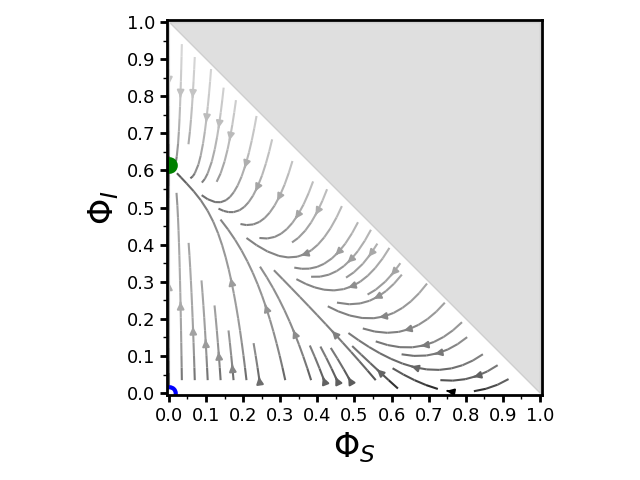

C:\Users\Renato\Anaconda3\envs\MumotEnv\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Renato\Anaconda3\envs\MumotEnv\lib\site-packages\numpy\ma\core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\Renato\Anaconda3\envs\MumotEnv\lib\site-packages\matplotlib\colors.py:469: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])
C:\Users\Renato\Anaconda3\envs\MumotEnv\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [46]:
vector1 = model2.stream('S', 'I',showFixedPoints = True)

The SIRI model has a continuum of equilibria corresponding to all infection free points (i.e., $I=0$) and an endemic fixed point where $I > 0$. The endemic fixed point exists if and only if $\hat{\beta}/\delta > 1$. 

In [ ]:
vector1.showLogs(tail = True)

We can look at this in more detail in a bifurcatio diagram.

FloatSlider(value=2.0, continuous_update=False, description='\\(R_{0}\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(d\\)', max=20.0, readout_format='.1f')

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=2.0, continuous_update=False, description='Initial \\(R_1\\) : ', max=20.0, readout_format='.1f', style=SliderStyle(description_width='initial:')), FloatSlider(value=1.0, continuous_update=False, description='Reactant \\(I\\) at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(R\\) at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(S\\) at t=0: ', max=1.0, step=0.01, style=SliderStyle(description_width='initial'))), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

<IPython.core.display.Javascript object>


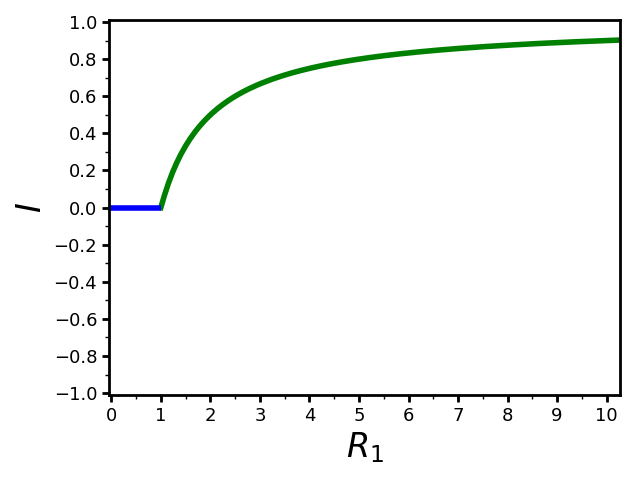

In [47]:
bifurcation1 = model2.bifurcation('R_1','I')

Our new bifurcation plot lets us see what happens to fixed points in the system as we vary a control parameter, in this case the cross-inhibitory stop-signalling rate between bees, $s$. We have also chosen not to observe a single reactant as our state variable, but rather the difference between two of them; this makes sense because in decision-making we care about the difference in votes for options

Our plot shows the location of fixed points, and they are either depicted as *stable* (solid line) or *unstable* (dashed line). Where the stability of fixed points changes, or fixed points appear of dissappear, these are referred to as *bifurcation points*. 

THIS IS NOT SHOWING THE UNSTABLE BRANCHES!

### The effects of finite system size

The ODE models we have been looking at based on our model are very useful, but they represent an idealised scenario; they describe the behaviour of a system with infinitely many components or, to put it another way, the expected behaviour of the system, minus any noise.

Noise is very important in collective behavour systems, however, and can have a variety of causes. The first cause we will consider is noisy fluctuations from the infinite population ideal, caused by having a finite, much smaller, population. To begin analysing the noise in our system, dependent on its size, we can deploy two main techniques; stochastic simulation, and statistical physics analysis.

We will return to stochastic simulation later, concentrating first on statistical physics analysis. As you might imagine, the maths involved in a statistic physics analysis is very advanced, based on deriving and then analysing the *Master Equation*; fortunately MuMoT automates this analysis for you.

Brace yourself, this might look intimidating...

In [48]:
model1.showMasterEquation()

<IPython.core.display.Math object>

You really don't need to understand the equation above, but it's nice to know that MuMoT generated it for you, isn't it? The Master Equation describes the probabilities of different transitions between system states. We are particularly interested in it because we can use it to derive the infinite population behaviour of the system (the ODEs we already saw), but also the noise around that. This is done by applying a technique called the *van Kampen expansion* [van Kampen, 2007)](#references), to approximate the *Focker-Planck equation*. In the *Advanced users* section at the end of this manual you'll be able to look at these equations, if you dare, to convince yourself that MuMoT is doing some clever stuff for you

But what is this clever stuff useful for? Well, for one thing, it lets us see approximately what the effects of noise, caused by finite system size, are in terms of deviations from the fixed points of the system...

FloatSlider(value=0.5, continuous_update=False, description='\\(R_{0}\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(R_{1}\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(d\\)', max=10.0, readout_format='.1f')

IntSlider(value=5, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


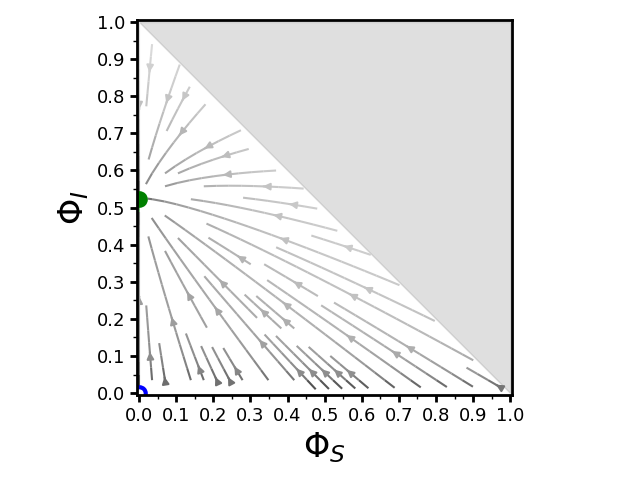

{R: 1, S: 0.0, I: 0.0}
Using params: [('d', 0.5), ('R_{1}', 0.5), ('R_{0}', 0.5), ('plotLimits', 1), ('systemSize', 5)]
{R: 1, S: 0.0, I: 0.0}
Using params: [('d', 0.5), ('R_{1}', 0.5), ('R_{0}', 2.4), ('plotLimits', 1), ('systemSize', 5)]
{R: 0.476190476190476, S: 0.0, I: 0.523809523809524}
Using params: [('d', 0.5), ('R_{1}', 2.1), ('R_{0}', 2.4), ('plotLimits', 1), ('systemSize', 5)]
{R: 0.476190476190476, S: 0.0, I: 0.523809523809524}
Using params: [('d', 0.5), ('R_{1}', 2.1), ('R_{0}', 2.4), ('plotLimits', 1), ('systemSize', 73)]


In [49]:
stream2 = model2.stream('S','I', showFixedPoints = True, showNoise = True)

This new `stream` plot now lets us see how the system's expected state gets 'spread out' around the fixed points. Slide the system size slider to see how the extent of the spread depends on the number of components in the system; slide the other sliders to see how the shape of the noise changes, in a way we might not have guessed, as the parameters change.

The effects of noise in the `stream` plot above are based on <s>mathematical approximations</s> the computational approximations of the Master Equation. When the system has less one or two reactant the noise effects can be mathematically approximated from the Master Equation. The computational approximation is achieved through the efficient and accurate *Stochastic Simulation Algorithm* (SSA) (or *Doob-Gillespie algorithm*) [(Gillespie, 1976)](#references). Alternatively, MuMot gives access to the SSA simulator to simply visualise the behaviour of the system over time.

To run the SSA simulations on your model, you can use the command `SSA()`. This command allow you to run a single simulation run, you can specify several advanced parameters from the _"Advanced options"_ tab, as described in the [Command reference](#comreference) section.
Try modifying the parameters and see how they change your results.

FloatSlider(value=2.0, continuous_update=False, description='\\(R_{0}\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(R_{1}\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(d\\)', max=20.0, readout_format='.1f')

IntSlider(value=50, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=0.1, continuous_update=False, description='Reactant \\(I\\)', disabled=True, max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(R\\)', max=0.1, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.9, continuous_update=False, description='Reactant \\(S\\)', max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), IntText(value=966866875, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('I', 'I'), ('R', 'R'), ('S', 'S')), style=DescriptionStyle(description_width='initial'), value='I'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('I', 'I'), ('R', 'R'), ('S', 'S')), style=DescriptionStyle(description_width='initial'), value='R'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


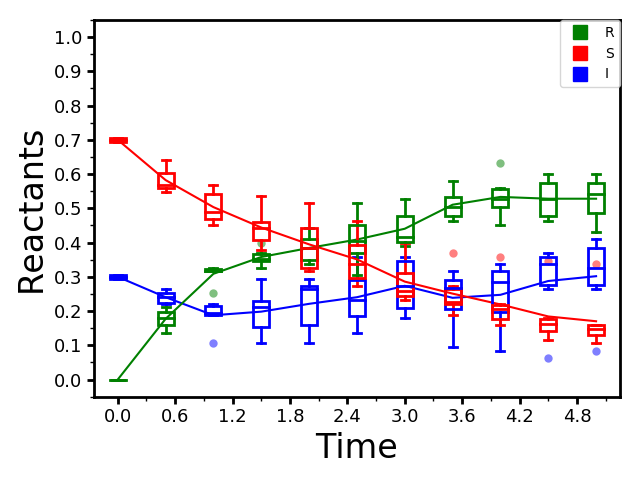

In [51]:
ssa = model2.SSA(initWidgets={'initialState': {'S': [0.9,0,1,0.05], 'I': [0.1,0,1,0.05], 'R': [0,0,1,0.05]},
                              'systemSize':[50,5,100,1] })

### Spatial noise

MuMoT also enables more sophisticated stochastic simulations of your model. The `multiagent` command allows you to run simulations either with static agents interacting over a static communication network, or mobile agents communicating to neighbours within a local range of communication.

Each agent represents a reactant, and exchanges messages to interact with other agents and change its internal state  (described as a *probabilistic finite state machine*). The conversion of transition rates into the probabilities is done following the methodology proposed in Reinal et al. ([2005](#references)).

The multiagent simulations have several _Advanced options_, as described in the [Command reference](#comreference) section. Try modifying the parameters to see how they change your results.

FloatSlider(value=2.0, continuous_update=False, description='\\(R_{0}\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(R_{1}\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(d\\)', max=20.0, readout_format='.1f')

IntSlider(value=20, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=0.1, continuous_update=False, description='Reactant \\(I\\)', disabled=True, max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(R\\)', max=0.1, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.9, continuous_update=False, description='Reactant \\(S\\)', max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.FULLY_CONNECTED: 0>), FloatSlider(value=0.0, continuous_update=False, description='Network connectivity parameter', layout=Layout(width='50%'), max=0.0, readout_format='.0f', step=0.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=1389252251, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Network', 'graph'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('I', 'I'), ('R', 'R'), ('S', 'S')), style=DescriptionStyle(description_width='initial'), value='I'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('I', 'I'), ('R', 'R'), ('S', 'S')), style=DescriptionStyle(description_width='initial'), value='R'), Checkbox(value=False, description='Show particle trace'), Checkbox(value=False, description='Show communication links'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


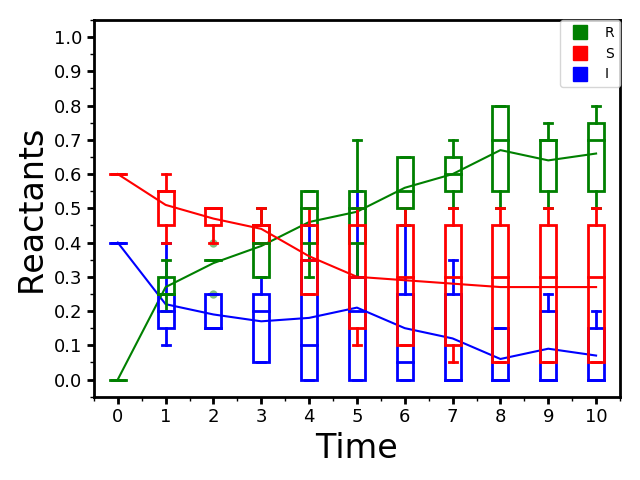

In [53]:
ssa = model2.multiagent(initWidgets={'initialState': {'S': [0.9,0,1,0.05], 'I': [0.1,0,1,0.05], 'R': [0,0,1,0.05]},
                              'systemSize':[20,5,100,1], 'visualisationType':'multiagent' })

### Going to a higher dimension
Our first model ended up being 2-dimensional, after we realised that there were a constant number of components in the system. However MuMoT can work with higher-dimensional models (although not all features are supported for them; see [Supported features](#features)).

### Non-constant system size
Not all models are of the kind studied above, in which there are a constant number of components. In open systems components can be created and destroyed, so the total size of the system can fluctuate over time, and in principle has no limits.

A classic model from both ecology and chemistry is the *Lotka-Volterra* model; ecologists often think of this as representing two interacting populations, one of predators, and one of prey. Individuals are born and die in both populations. MuMoT enables this both via the `\emptyset` notation $\emptyset$, in which components spontaneously arise from nothing, or are destroyed, and via steady-state reactant populations, denoted with `()`, which do not change over time but simply persist at a constant size.

Our Lotka-Volterra example is taken from Murray ([2002](#references), p124). Individuals are born into the prey population $X$ at a rate that depends on that population size, then predatory interactions decrease the prey population size and increase the predator population size. Finally, predators experience background mortality.

In [ ]:
%%model
$
(A) + X -> X + X : \alpha
X + Y -> Y + Y : \beta
Y -> \emptyset : \gamma
$

In [ ]:
model5 = mmt.parseModel(In[24])
model5.show()

In [ ]:
model5.showODEs()

Note that there is no equation for $A$; since it is specified to be at a constant concentration, there is no equation for $A$'s change over time. This means that when we try and interact with the model, we will need to specify the constant value that $A$ should take.

Also, since the system size is now no longer constant, as discussed above, it is now useful to be able to change the limits on the plot, to ensure that all the interesting behaviour of the system is visible...

In [ ]:
stream2 = model5.stream('X','Y', showFixedPoints = False)

### Bookmarking
<a id='bookmarking'></a>

If you find an interesting parameter set and want to preserve it, you can store those parameter values in a form that lets you reproduce your analysis. Simply click on the bookmark button underneath the sliders; you should see a message that a bookmark has been pasted to the logs, and instructions how to view it. Let's follow these instructions from our latest plot... click the bookmark button, then run the following command:

In [ ]:
stream2.showLogs(tail = True)

Now we need simply copy the last line of the log file, paste into a new cell, and replace `<modelName>` with the model we are working with, in this case `model5`; this is easily done by clicking in the cell then using *Find and Replace* from the *Edit* menu. We will also give our new bookmarked view a unique name, so we can refer to it if we need to in the future...

In [ ]:
bookmark1 = model5.stream('X', 'Y', params = [('\\beta', 0.8), ('\\alpha', 0.5), ('A', 0.5), ('\\gamma', 0.5), ('plotLimits', 3.5), ('systemSize', 1)], showFixedPoints = False, bookmark = False)

### Command reference
<a id='comreference'></a>

#### Supported features
<a id='features'></a>
##### Graphical output
<a id='graphout'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>stream</code></td>
    <td>&#10005;</td> 
    <td>&#10003;</td> 
    <td>&#10005;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>vector</code></td>
    <td>&#10005;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>SSA</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>multiagent</code><br>(static network)<br>(moving particles)</td>
    <td><br>&#10003;<br>&#10003;</td> 
    <td><br>&#10003;<br>&#10003;</td> 
    <td><br>&#10003;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
  </tr>
  <tr>
      <td><code>stream</code><br>(analytical noise)<br>(computational noise)</td>
    <td><br>&#10003;<br>&#10005;</td> 
    <td><br>&#10005;<br>&#10003;</td> 
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
    <td><br>&#10005;<br>&#10003;</td>
  </tr>
  <tr>
    <td><code>bifurcation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10005;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>integrate</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
   <tr>
    <td><code>noiseCorrelations</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

##### Display of mathematical formulas
<a id='mathout'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>showODEs</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showODEs_vKE</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showMasterEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showVanKampenExpansion</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showFokkerPlanckEquation</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showNoiseEOM</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showNoiseStationarySol</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

##### Model properties
<a id='modelprop'></a>
<table>
  <tr>
    <th>Command</th>
    <th>1d-system</th> 
    <th>2d-system</th> 
    <th>3d-system</th>
    <th>4d-system</th> 
    <th>empty-set</th>
    <th>constant reactants</th>
  </tr>
  <tr>
    <td><code>show</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showRates</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showReactants</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showConstantReactants</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>showStoichiometry</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
  <tr>
    <td><code>visualise</code></td>
    <td>&#10003;</td> 
    <td>&#10003;</td> 
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
    <td>&#10003;</td>
  </tr>
</table>

#### Getting help
You can get help on commands by using the `help()` command. To get basic information on MuMoT, for example, type

In [ ]:
help(mmt)

To get help on a specific command, such as the `stream` command, available for a model, type

In [18]:
help(model1.stream)

Help on method stream in module MuMoT.MuMoT:

stream(stateVariable1, stateVariable2, stateVariable3=None, params=None, **kwargs) method of MuMoT.MuMoT.MuMoTmodel instance
    Display interactive stream plot of `stateVariable1` (x-axis), `stateVariable2` (y-axis), and optionally `stateVariable3` (z-axis; not currently supported - see below)
    
    Arguments:
        `stateVariable1` - state variable to be plotted on the x-axis
        `stateVariable2` - state variable to be plotted on the y-axis
        `stateVariable3 = None` - state variable to be plotted on the z-axis (not currently supported; use `vector` instead for 3-dimensional systems)
        `params = None` - parameter list (see 'Partial controllers' in the user manual: https://diodeproject.github.io/MuMoT/)
    
    Keywords:
        `showFixedPoints = False` - plot fixed points
        `showNoise = False` - plot noise around fixed points
        plotting keywords as described in the user manual: https://diodeproject.github

Optional arguments are given with the default value they will have if not supplied

Optional keywords may also be given; again the default value they will have if not supplied is given

All controller-generating commands have the optional argument `params`, which contains a list of fixed parameter values (see [Partial controllers](#partialcont))

In addition, all plotting functions accept a number of formatting keywords, as follows:

* TODO

#### Advanced options for `SSA`

* proportion of each reactant at timestep zero. Remember that the sum of all (non-constant) reactants must be 1.0
* simulation time is the length of each simulation run
* random seed which is a number to control (and repeat) random stochastic effects. Any run that uses the same random seed will have tha same identical random fluctuations
* flag to plot proportions (i.e. reactants are in closed interval [0,1]) or full populations (i.e. reactants are in closed interval [0,systemSize])
* flag to plot results in realtime. If True, the plot is updated each timestep of the simulation; if False, the plot is updated once at the end of the simulation
* number of simulation runs to be executed
* flag to aggregate or not the results from several runs
* type of visualisation::
  * Temporal evolution with y-axis showing the population size of each reactant varying as a function of the time on the x-axis. When aggregated, the results are visualised as boxplots. 
  * Final distribution of the population among the reactants. In this visualisation, the use can specify the reactants on x and y axes.  When aggregated, the results are visualised as an ellipse estimated as the covariance matrix
  * Barplot showing the final distribution. When aggregated, the barplots show the average and the error bars show the standard deviation; otherwise the results of the last simulation run are displayed

(Note that modifying the widgets: type of visualisation, flag to plot proportions, and flag to aggregate does not trigger the computation of new data. All other widgets do.)

#### Advanced options for `multiagent`
`multiagent` views have all the options described above for the `SSA` simulations and, in addition:
* type of network. Available types are:
  * Full graph; a complete network in which every agent communicates with every agent
  * Random network with Erdos-Renyi topology. The widgets allow to specify:
    * the linking probability with which each agent has a communication edge with another agent
  * Random network with Barabasi-Albert topology. The widgets allow to specify:
    * the number of edges every new node (during creation) is linked to
  * Simulation of moving particles in which agent move in a periodic space and interact locally. The widgets allow to specify:
    * range of interaction of the agent
    * motion correlatedness of the agent. Correlatedness = 1 correponds to straight movement, Correlatedness = 0 corresponds to uncorrelated random walk.
    * speed of the agent, i.e. displacement in one timestep
    * flag to show the motion trajectory of the agents
    * flag to show interactions; agents within communication range are liked through a line
* length of one timestep; the maximum timestep is determined by the rates

(Note that in addition to the one specified for the `SSA` simulations, here the widgets to show motion trajectory and to show interactions do not trigger the recomputation of the simulations).
Static networks are available only for models that do not contain the empty-set or constant reactant, whereas moving particles have no constraints; see [*Supported features*](#features).

#### Advanced options for `bifurcation`
* Initial &#60;&#60;name of bifurcation parameter&#62;&#62;:
  * Here you can choose the starting value of the bifurcation parameter. MuMoT tries to determine all stationary states and starts numerical continuation (using PyDSTool) from all stable fixed points found.
* Reactant &#60;&#60;name of reactant&#62;&#62; at t=0:
  * This will only have an effect if no stationary solutions could be detected. Then these initial conditions will be passed on to PyDSTool for the numerical continuation.
* Note: Currently only 1D and 2D ODE systems are supported in `bifurcation` and only Branch Points (BP) and Limit Points (LP) can be detected in 1-parameter bifurcations (or more adequately termed codimension one bifurcations).

#### Advanced options for `integrate` and `noiseCorrelations`
* Reactant &#60;&#60;name of reactant&#62;&#62; at t=0:
  * Determine the initial conditions for all reactants in the systems. Note that if `conserved = True` occurs as a keyword argument in `integrate` and `noiseCorrelations` then initial conditions cannot be set independently. 
* Simulation time: 
  * Determines the length of the simulation.
* Plot proportions (only in `integrate`): 
  * Choose if absolute numbers or proportions are displayed (check box). Proportions are denoted $\Phi$ with the reactant as index. If true, the absolute number is divided by the total number of reactants (system size) at t=0. If the system is conserved, the sum of all concentrations sum up to 1 for all t.

### Advanced users

#### Partial controllers
<a id='partialcont'></a>
If you are creating a notebook to demonstrate a concept, it may be easiest to fix some of the parameters to ensure that the user can only vary the parameters you want them to. Partial controllers can be created by passing the standard commands a list `params` of parameter name, parameter value pairs. For example...

In [ ]:
partial1 = model4.stream('A','B', params = [('\\mu',1),('s',1)], showFixedPoints = False)

#### Viewing the Master and Fokker-Planck equations, and calculating & displaying noise

Just to make sure you really want to look at these, and because the size of the equations can slow down your browser, some of the following commands are commented. Uncomment then run if you want to see the gory details...

To show this functionality we make use of a model describing the production and decay of protein $P$ and its dimerization into $P_2$ (more conveniently called $X$ and $Y$ below), see Hayot & Jayaprakash ([2004](#references)) for details. This model is defined as:

In [ ]:
%%model
$
\emptyset -> X : k_3
X -> \emptyset : k
X + X -> Y + \emptyset : k_1
Y + \emptyset -> X + X : k_2
$

As you already know it from the examples above, let's parse the model ...

In [ ]:
model6 = mmt.parseModel(In[34])

Now that MuMoT knows the model, we can continue deriving the <b>chemical Master equation</b>. 

Master equations describe the time evolution of a system that, in general, can be in one of many different possible states at a given point in time with a certain probability. Over time, the system makes transitions so that the overall state changes continuously. Transitions are governed by transition probabilities that are usually summarised in a transition matrix. The Master equation is a set of first-order differential equations that describe the evolution of the state dependent probabilities driven by the transition matrix.

The <b>chemical Master equation</b> ([van Kampen, 2007](#references)) is a master equation for the probabilities that the system has any given composition of rectants as a function of time. In MuMoT this equation can be derived using:

In [ ]:
model6.showMasterEquation()

Here, P(X,Y,t) describes the probability to observe the systems's composition of reactants X and Y at time t. In MuMoT, the system size that, at this point, is not specified and which is used as formal parameter for the system size expansion described below is denoted $\overline{V}$. Please pay attention to this notation when defining your model using the letter $V$ (but don't worry, MuMoT will not confuse both variables).

Here we used step operators $E_{op}$ to express the chemical Master equation in a compact form. Note that we have implemented the derivation of the Master equation as it was originally done in [van Kampen (2007)](#references).

Unfortunately, there is only a limited number of simple cases that allow to solve the Master equation exactly. Hence, analytical approximations may help, such as the system size expansion (also called van Kampen expansion), which is automatised in MuMoT using `showVanKampenExpansion`. 

The idea of this method is to expand the Master equation in powers of a small parameter, which is
<br>
$$\sim \frac{1}{\sqrt{system\, size}} \,.$$
<br>

Let's do the expansion with MuMoT and display it for the current model ($\overline{V}$ = system size):

In [ ]:
#model6.showVanKampenExpansion()

This equation describes an expansion in the parameter $\overline{V}$, which represents the system size. We repeat that at this point this is not specified. However, often $\overline{V}$ is a volume or the total number of particles in a real system. For more information on the system size expansion we refer to [van Kampen (2007)](#references).

Collecting all terms $\propto \sqrt{\overline{V}}$ gives the ODEs, which can be displayed using:

In [ ]:
model6.showODEs_vKE()

Here, we have introduced $\Phi_{X,Y}$, which describe the concentrations of $X$ and $Y$ in the mixture (i.e. $\Phi_{X}=X/\overline{V}$, for example). We note that the time-dependent quantities in the ODEs correspond to concentrations when derived via van Kampen expansion.

Next, if we collect all terms $\propto \overline{V}$ we obtain the Fokker-Planck equation in the linear noise approximation:

In [ ]:
model6.showFokkerPlanckEquation()

This equation describes the probability of fluctuations $\eta_{X,Y}$ at time t. In MuMoT, fluctuations are automatically denoted $\eta$ with the index denoting the reactant. These quantities describe the fluctuations around the mean field value of the concentrations $\Phi_{X,Y}$. 

Having this equation allows us derive the equations of motion for the fluctuations. This can be done using:

In [ ]:
model6.showNoiseEOM()

Here, we have first-order moments, $\langle \eta_{X}\rangle$ and $\langle \eta_{Y}\rangle$, and second-order moments, $\langle \eta_{R_1}\eta_{R_2}\rangle$, where $R_{1,2}=X,Y$.

We can analytically derive the stationary solutions of these equations and display them using:

In [ ]:
model6.showNoiseStationarySol()

Another possibility to study noise in the system is by calculating the time-dependent noise-noise correlations according to:

In [ ]:
nc1 = model6.noiseCorrelations(initWidgets={'maxTime':[20,5,50,1]})

These correlation functions relate to fluctuations around a fixed point. To see the corresponding fixed point we can simply show the logs:

In [ ]:
nc1.showLogs()

Please keep this stationary state of the system in mind for a little moment.

In MuMoT, we can also numerically integrate our dynamical system (here model6). To do this, we use the `integrate` method as follows: 

In [ ]:
int1 = model6.integrate(initWidgets={'maxTime':[30,5,50,1]})

Now click on the *Advanced options* tab above the figure and tick the *Plot population proportions* tab. We then display the last point on the curve by showing the logs with the following command:

In [ ]:
int1.showLogs()

Here, you can see the last point on the curve before selecting to plot proportions and after choosing this option. Remember, the proportions are calculated by dividing the total numbers by the system size at t=0 (which, if you haven't changed anything, should equal 10 in the plot above -- see the *System size* slider above the figure). 

Please note that the values on the sliders are the same as in the plot of the noise-noise correlations above. If you could memorise the fixed point around which the correlation functions were plotted (if not, it was ($\Phi_X=1$, $\Phi_Y=1$)) and compare this with the last point on the curve above (see `int1.showLogs` above), we can safely say that both are in agreement. So, it works! The noise-noise correlations have been plotted around the stationary state of the dynamical system. Using `integrate` we obtained a graphical confirmation of this.

Finally, we would like to mention that `integrate` can be used as soon as the model has been defined and parsed. It is also useful independent of studying noise in the system.

### References
<a id='references'></a>
* Gillespie, D. T. (1976). A general method for numerically simulating the stochastic time evolution of coupled chemical reactions. *Journal of Computational Physics* **22** (4): 403–434
* Hayot, F. & C. Jayaprakash (2004) 
[The linear noise approximation for molecular fluctuations within cells](http://iopscience.iop.org/article/10.1088/1478-3967/1/4/002/pdf). *Physical Biology* **1**, 205-210
* Murray, J. D. (2002) *Mathematical Biology I. An Introduction (Second Edition)*. Springer
* Pais, D., Hogan, P.M., Schlegel, T., Franks, N.R., Leonard, N.E. & Marshall, J.A.R. (2013) [A mechanism for value-sensitive decision-making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073216).  *PLoS one* **8**(9), e73216
* Reina A., Valentini G., Fernández-Oto A., Dorigo M. & Trianni V. (2015) [A design pattern for decentralised decision making](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0140950).  *PLoS one* **10**(10), e0140950
* Seeley, T.D, Visscher, P.K. Schlegel, T., Hogan, P.M., Franks, N.R. & Marshall, J.A.R. (2012) [Stop signals provide cross inhibition in collective decision-making by honeybee swarms](http://www.sciencemag.org/content/335/6064/108.full.pdf). *Science* **335**, 108-111
* van Kampen, N. (2007) *Stochastic Processes in Physics and Chemistry (Third Edition)*. North-Holland